In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Load the data
fn = 'https://raw.githubusercontent.com/stanford-mse-125/demos/main/data/father_son.tsv'
df = pd.read_csv(fn, sep='\t')
df

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3
...,...,...
1073,67.0,70.8
1074,71.3,68.3
1075,71.8,69.3
1076,70.7,69.3


<AxesSubplot:xlabel='Father', ylabel='Son'>

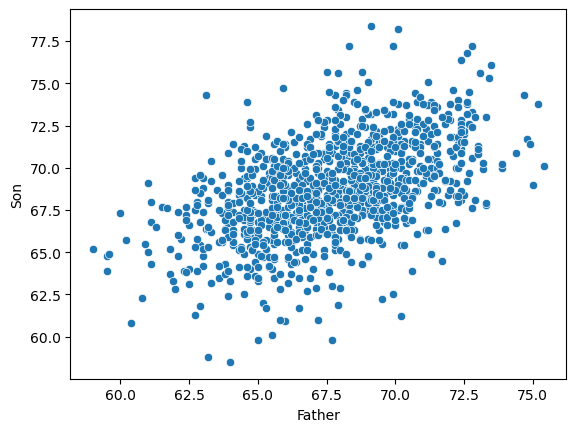

In [3]:
# scatterplot of the data
sns.scatterplot(x='Father', y='Son', data=df)

# The standard deviation line

1. Goes through the point of averages
2. Climbs (or falls) one vertical SD for one horizontal SD

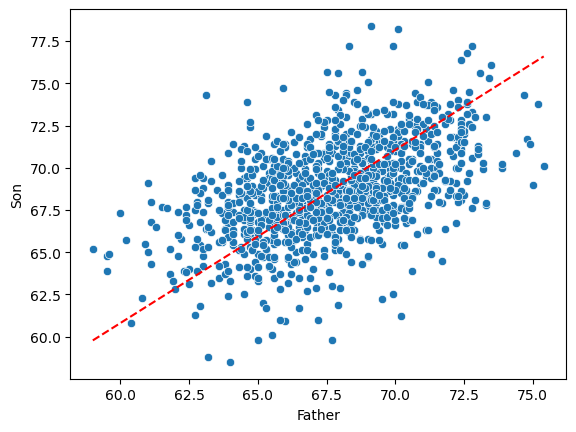

In [4]:
# add the standard deviation line to the plot
avg_father = df['Father'].mean()
avg_son = df['Son'].mean()
std_father = df['Father'].std()
std_son = df['Son'].std()

sns.scatterplot(x='Father', y='Son', data=df)
# plot a line through the point (avg_father, avg_son) with slope std_son/std_father
x = np.linspace(df['Father'].min(), df['Father'].max(), 100)
y = avg_son + (x - avg_father) * std_son / std_father
plt.plot(x, y, color='red', linestyle='--')

# Standardization

* rescales variables to "standard units"
* subtracts mean and divides by variance
* standardized variables have mean 0 and variance 1

In [5]:
# standardize father's heights
df['Father_std'] = (df['Father'] - avg_father) / std_father
# standardize sons' heights
df['Son_std'] = (df['Son'] - avg_son) / std_son
df

,Father,Son,Father_std,Son_std
0,65.0,59.8,-0.978513,-3.154694
1,63.3,63.2,-1.597634,-1.947391
2,65.0,63.3,-0.978513,-1.911882
3,65.8,62.8,-0.687162,-2.089426
4,61.1,64.3,-2.398850,-1.556793
...,...,...,...,...
1073,67.0,70.8,-0.250135,0.751287
1074,71.3,68.3,1.315878,-0.136436
1075,71.8,69.3,1.497972,0.218653
1076,70.7,69.3,1.097364,0.218653


<AxesSubplot:xlabel='Father_std', ylabel='Son_std'>

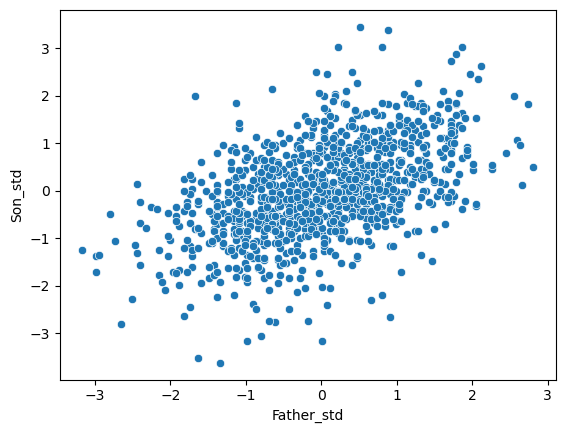

In [6]:
# plot standardized data
sns.scatterplot(x='Father_std', y='Son_std', data=df)

# Correlation

**definition:** the correlation is the average of the products of the variables, when both are measured in standard units

* measures the association between two variables
* equal to the angle between the (vector) variables
* quantifies the dispersion of the points around the SD line
* ranges from -1 to 1

to compute correlation:
1. transform to standard units by subtracting mean and dividing by standard deviation
2. compute $\sum_i x_i y_i$

In [7]:
# compute correlation
def corr(x,y):
    # step 1: transform to standard units
    x_std = (x - x.mean()) / x.std()
    y_std = (y - y.mean()) / y.std()
    # step 2: compute the correlation
    return (x_std * y_std).mean()

Correlation: [[1.         0.42676299]
 [0.42676299 1.        ]]


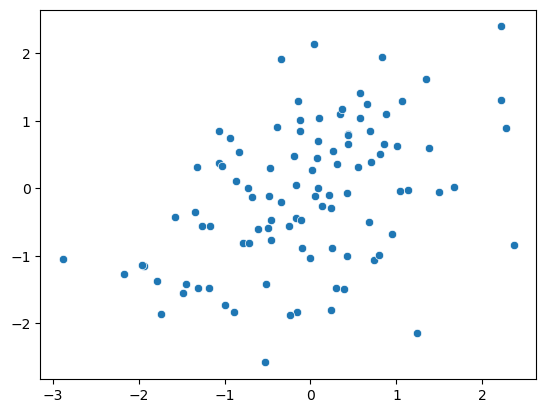

In [8]:
# sample random points with a given (average) correlation
def visualize_correlation(cor = .2):
    alpha = cor**2
    n = 100
    x = np.random.randn(n)
    y = np.sqrt(1-alpha) * np.random.randn(n) + np.sqrt(alpha) * np.sign(cor) * x

    sns.scatterplot(x=x, y=y)

    # compute the correlation
    print("Correlation:", np.corrcoef(x, y))

visualize_correlation(.5)
plt.savefig('figures/correlation_4.png')

# poll: is this correlation closer to 

* A) -1
* B) -.5
* C) 0
* D) .5
* E) 1

Correlation: [[ 1.         -0.50041953]
 [-0.50041953  1.        ]]


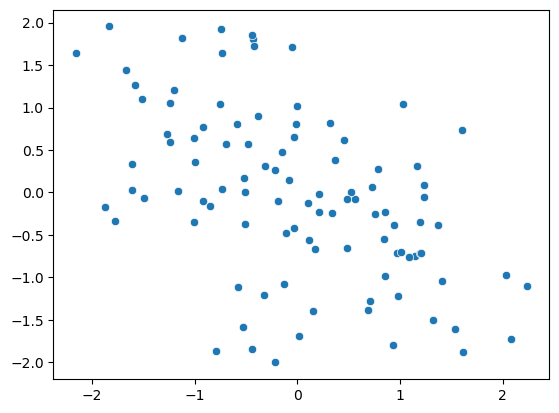

In [28]:
visualize_correlation(-.5)

# Properties of correlation

* scale invariant
* measures linear association
* sensitive to outliers

## Correlation is scale invariant

In [29]:
# scale invariant
n = 100
x = np.random.randn(n)
y = np.random.randn(n)
corr(x,y), corr(2*x, 7*y)

(-0.018959809489791514, -0.018959809489791493)

## Correlation measures linear association

0.0968022939089289

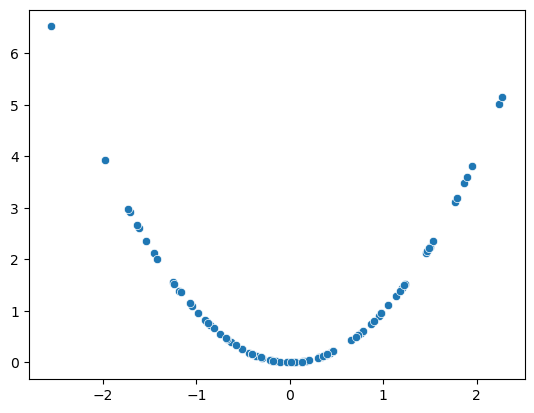

In [ ]:
# measures linear association 
np.random.seed(0)
x = np.random.randn(n)
y = x**2
sns.scatterplot(x=x, y=y)

### poll: is this correlation closer to 

* A) -1
* B) -.5
* C) 0
* D) .5
* E) 1

In [32]:
corr(x,y)

1.0000000000000004

## Correlation is sensitive to outliers

1.0000000000000004

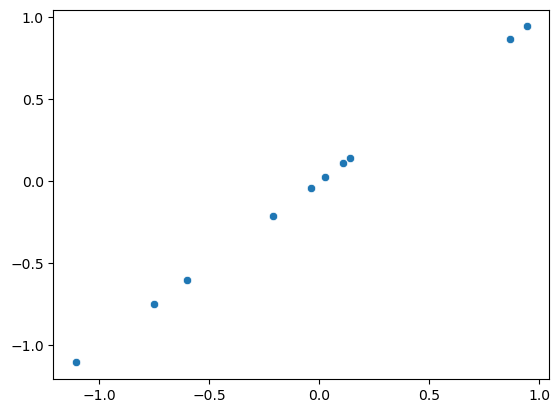

In [31]:
# generate correlated data
x = np.random.randn(10)
y = x

# add an outlier
# x = np.append(x, 3)
# y = np.append(y, -3)

sns.scatterplot(x=x, y=y)
corr(x,y)